https://fivethirtyeight.com/features/can-you-pass-the-cranberry-sauce/

# Riddler Express

# Riddler Classic

Let's do a simulation first.

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
n_trials = 10000
n_seats = 4
lasts = np.zeros(n_seats + 1)
for t in range(n_trials):
    left = 0
    right = n_seats
    current = 0
    
    while True:
        if stats.bernoulli(0.5).rvs():
            if current == n_seats:
                current -= n_seats
            if current == left:
                left += 1
            current += 1

        else:
            if current == 0:
                current += n_seats
            if current == right:
                right -= 1
            current -= 1

        # print(f"{left:2d} {current:2d} {right:2d}")
        if left + 1 == right:
            lasts[current] += 1
            break
    if t % 100 == 0:
        print(t, end='')
    if t % 10 == 0:
        print('.', end='')
            

lasts[0] += lasts[n_seats]
lasts[n_seats] = 0

0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000..........4100..........4200..........4300..........4400..........4500..........4600..........4700..........4800..........4900..........5000..........5100..........5200..........5300..........5400..........5500..........5600..........5700..........5800..........5900..........6000..........6100..........6200..........6300..........6400..........6500..........6600..........6700..........6800..........6900..........7000..........7100..........7200

In [39]:
print(lasts)

[   0. 3329. 3327. 3344.    0.]


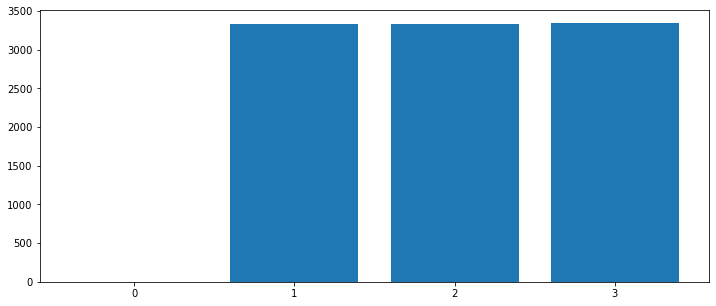

In [40]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(range(n_seats),
       lasts[:-1])
ax.set_xticks(range(n_seats));

Well that's odd.

Let's do a markov chain with 4 people.

The states are:

letter | current | left | right | next
-------|---------|------|-------|------
a | 0 | 0 | 4  | c, h
b | 0 | 1 | 4  | c, i
c | 1 | 1 | 4  | f, b
d | 0 | 2 | 4  | e, X
e | 1 | 2 | 4  | f, d
f | 2 | 2 | 4  | X, e
X | 3 | 3 | 4  | 
g | 0 | 0 | 3  | j, h
h | 3 | 0 | 3  | g, n
i | 0 | 1 | 3  | j, k
j | 1 | 1 | 3  | X, i
k | 3 | 1 | 3  | j, X
X | 2 | 2 | 3  | 
X | 3 | 2 | 3  | 
l | 0 | 0 | 2  | X, m
m | 3 | 0 | 2  | l, n
n | 2 | 0 | 2  | m, X
X | 1 | 1 | 2  | 
X | 2 | 1 | 2  | 
X | 1 | 0 | 1  | 


That's a pain. Left simplify, tracking number visited and position within visit, removing all symmetry.

letter | length | position | next
-------|--------|----------|------
a | 0 | 0 | b
b | 1 | 0 | b, c
c | 2 | 0 | b, d
d | 2 | 1 | c
X | 3 | - | 

Um, never mind, that won't help with the end position.